### Part 1 : Linear Regression with all features


$ X_{(d+1)\times m}=\begin{bmatrix}1 & 1  & ...& 1\\x^1_1 & x^1_2 &... & x^1_m\\: & : & & :\\ x_1^{d}  &x^{d}_2  &...& x^{d}_m\end{bmatrix}
\,\,, \,\, Y_{m\times 1}=\begin{bmatrix}y_1 & y_2  & ...& y_m\end{bmatrix}^T
\\
\Rightarrow \begin{cases}A_{(d+1)\times(d+1)}=X.X^T
\\ \beta_{(d+1)\times 1} = X.Y \\ \end{cases} \Rightarrow W^*=A^{-1} . \beta
$

#### 1.importing Data and seperating into Test and Validation:


In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('Q1_data.csv')

valid_data=data.loc[len(data)*0.8:]
train_data=data.loc[:len(data)*0.8]


#### 2.calculating best W:


In [2]:
Y =train_data[['Chance of Admit ']].to_numpy().reshape(-1)
X=train_data.to_numpy()
X=np.transpose(np.hstack([np.ones((len(X),1)), X[:,1:-1]]))

A=np.matmul(X,np.transpose(X))
Beta=np.matmul(X,Y)

   
$\;\;\;\;\;$**W is :**

In [3]:
W=np.matmul(np.linalg.inv(A),Beta)
print("W = " ,[round(i,5) for i in W])

W =  [-1.14854, 0.00133, 0.00251, 0.00595, 0.00377, 0.01611, 0.12575, 0.02377]


#### 3.calculate Empirical and True Risk:


In [4]:
Y_predict=np.matmul(W,X)

Empirical_risk=np.sum(np.power(Y_predict-Y,2))/len(X[0])


Y_valid =valid_data[['Chance of Admit ']].to_numpy().reshape(-1)
X_valid=valid_data.to_numpy()
X_valid=np.transpose(np.hstack([np.ones((len(X_valid),1)), X_valid[:,1:-1]]))

Y_valid_predict=np.matmul(W,X_valid)
True_risk=np.sum(np.power(Y_valid_predict-Y_valid,2))/len(X_valid[0])

print('Empirical risk : {:.4e}'.format(Empirical_risk))
print('True risk      : {:.4e}'.format(True_risk))


Empirical risk : 3.4732e-03
True risk      : 3.8595e-03


***

### Part 2 : chosing  best feature


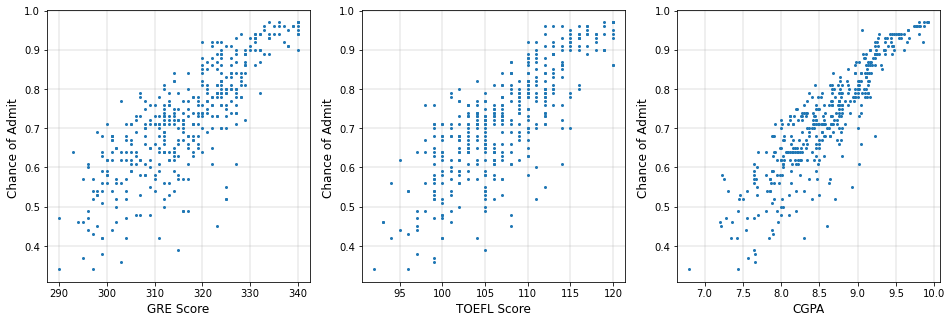

In [5]:
import matplotlib.pyplot as plt
features=train_data.columns[1:-1]

plt.figure(figsize=(16,5))
for i,j in enumerate([0,1,5]):
    plt.subplot(1,3,i+1)
    plt.plot(X[j+1],Y,'.',markersize=4); plt.grid(linewidth=.4); 
    plt.ylabel('Chance of Admit ' , fontsize='large'); plt.xlabel(features[j],fontsize='large');



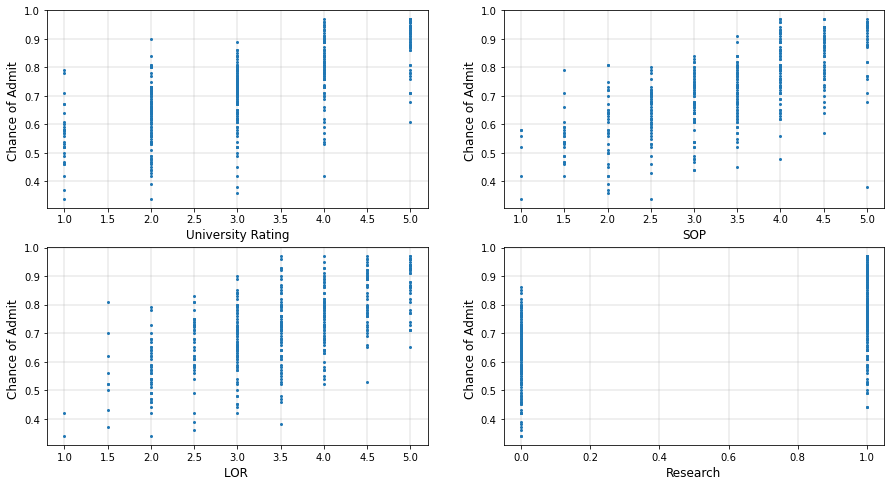

In [6]:
plt.figure(figsize=(15,8))
for i,j in enumerate([2,3,4,6]):
    plt.subplot(2,2,i+1)
    plt.plot(X[j+1],Y,'.',markersize=4); plt.grid(linewidth=.4); 
    plt.ylabel('Chance of Admit ' , fontsize='large'); plt.xlabel(features[j],fontsize='large');

***
<b>conclusion:</b>
based on above graphs we may choose `CGPA` as our input feature.
***

#### use CGPA to find a new W with one featue:


In [7]:
Y =train_data[['Chance of Admit ']].to_numpy().reshape(-1)
X=train_data[['CGPA']].to_numpy()
X=np.transpose(np.hstack([np.ones((len(X),1)), X]))

A=np.matmul(X,np.transpose(X))
Beta=np.matmul(X,Y)

   
$\;\;\;\;\;$**W is :**

In [8]:
W=np.matmul(np.linalg.inv(A),Beta)
print("W = " ,[round(i,5) for i in W])

W =  [-1.04294, 0.20539]


#### calculate Empirical and True Risk:


In [9]:
Y_predict=np.matmul(W,X)
Empirical_risk=np.sum(np.power(Y_predict-Y,2))/len(X[0])


Y_valid =valid_data[['Chance of Admit ']].to_numpy().reshape(-1)
X_valid=valid_data[['CGPA']].to_numpy()
X_valid=np.transpose(np.hstack([np.ones((len(X_valid),1)), X_valid]))

Y_valid_predict=np.matmul(W,X_valid)
True_risk=np.sum(np.power(Y_valid_predict-Y_valid,2))/len(X_valid[0])

print('Empirical risk : {:.4e}'.format(Empirical_risk))
print('True risk      : {:.4e}'.format(True_risk))


Empirical risk : 4.1396e-03
True risk      : 5.4198e-03


<div class="alert alert-block alert-success">
<b>Conclusion:</b>
</div>
 
<div style="direction:rtl">
در قسمت اول با استفاده از تمام feature ها اقدام به پیدا کردن W کردیم و لذا مدل ما امکان بیشتر و آزادی بیشتری برای fit شدن با داده ها داشت و لذا به نسبت روش دوم که فقط از یکی از ویژگی های برای پیدا کردن W و بهترین خط استفاده کردیم دچار خطای کمتری شده بود ، همچنین در هر دو مورد همانطور که انتظار میرود Empirical Risk کمتر از True Risk  شده و از طرفی در هیچ کدام هم True Risk  بیش از حد زیاد نشده و لذا دچار overfit نشده ایم
</div>
 

